# Package Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Wrangling

In [2]:
churn = pd.read_csv(r"/kaggle/input/churn-modelling/Churn_Modelling.csv")
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Cleaning

In [3]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
for i in churn.columns:
    print(i,':',sum(churn[i]=='?'))

RowNumber : 0
CustomerId : 0
Surname : 0
CreditScore : 0
Geography : 0
Gender : 0
Age : 0
Tenure : 0
Balance : 0
NumOfProducts : 0
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0


In [5]:
churn = churn.drop(['Surname','CustomerId','RowNumber'],axis=1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Analysis

/tmp/ipykernel_20/2100758775.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=churn.corr()


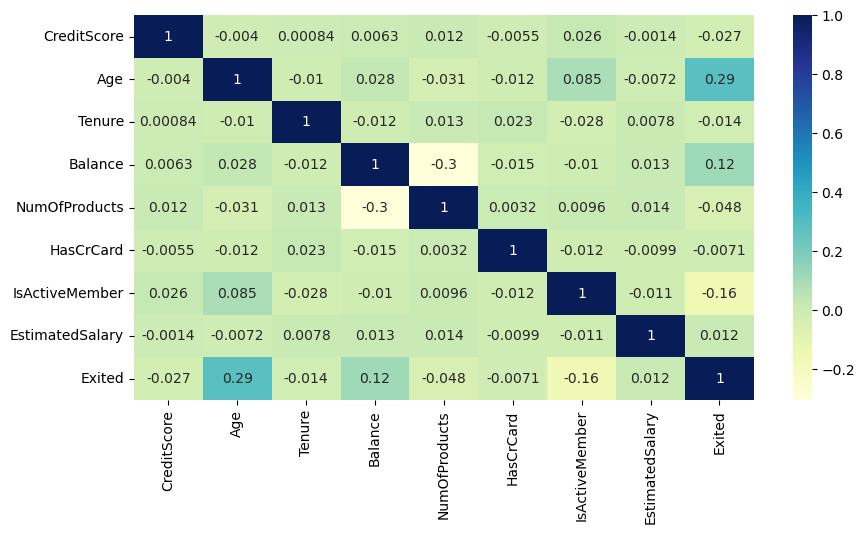

In [6]:
#heatmap
plt.figure(figsize=(10,5))
cor=churn.corr()
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

/tmp/ipykernel_20/2341028129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.CreditScore[churn.Exited==1])
/tmp/ipykernel_20/2341028129.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.CreditScore[churn.Exited==0])


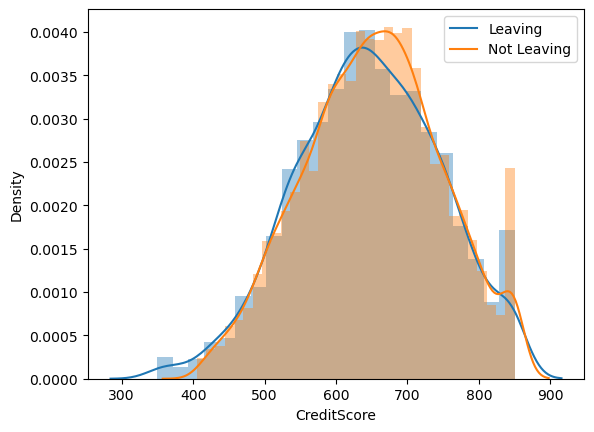

In [7]:
#analysis between CreditScore and Exited

sns.distplot(churn.CreditScore[churn.Exited==1])
sns.distplot(churn.CreditScore[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#CreditScore relation shows that people both leave and stay at each point

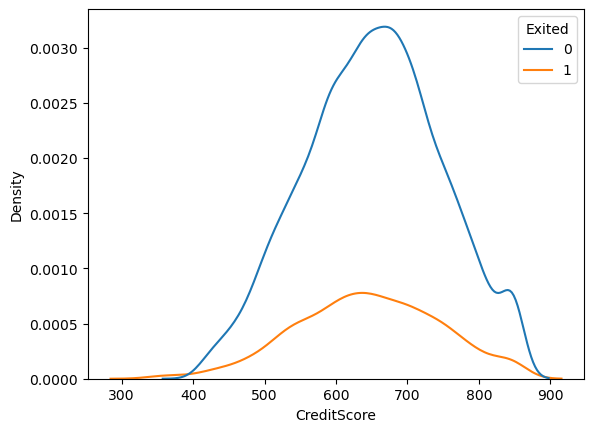

In [8]:
sns.kdeplot(x=churn.CreditScore,hue=churn.Exited)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


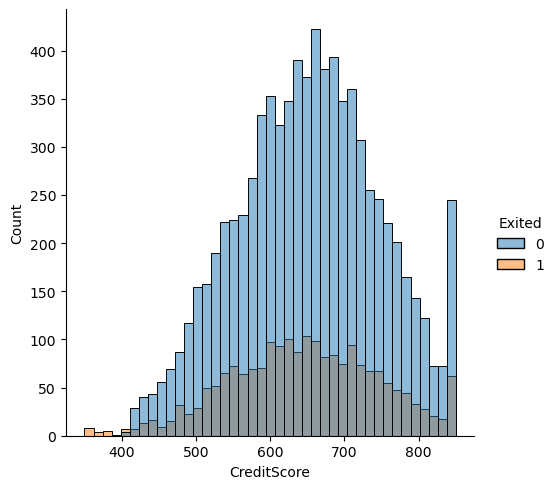

In [9]:
sns.displot(x=churn.CreditScore,hue=churn.Exited)
plt.show()

#data of persons leaving the bank is less, thus density of '1' is less

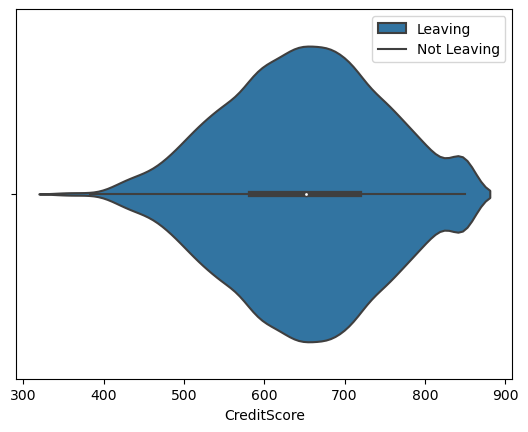

In [10]:
sns.violinplot(x=churn.CreditScore,hue=churn.Exited,data=churn)
plt.legend(['Leaving','Not Leaving'])
plt.show()

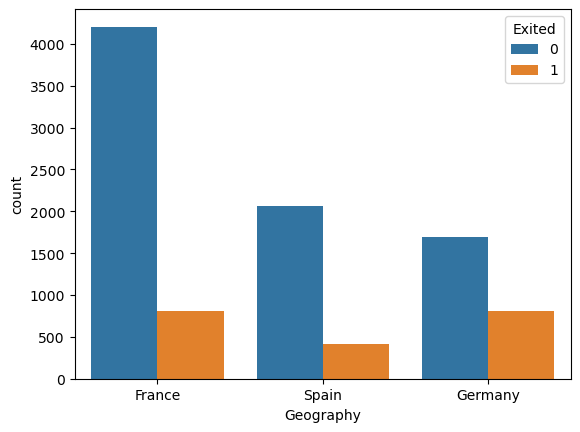

In [11]:
#analysis between geography and exited

sns.countplot(x=churn.Geography,hue=churn.Exited)
plt.show()

#the data from Geography affects the Exited, as more people from 'France' are leaving the bank

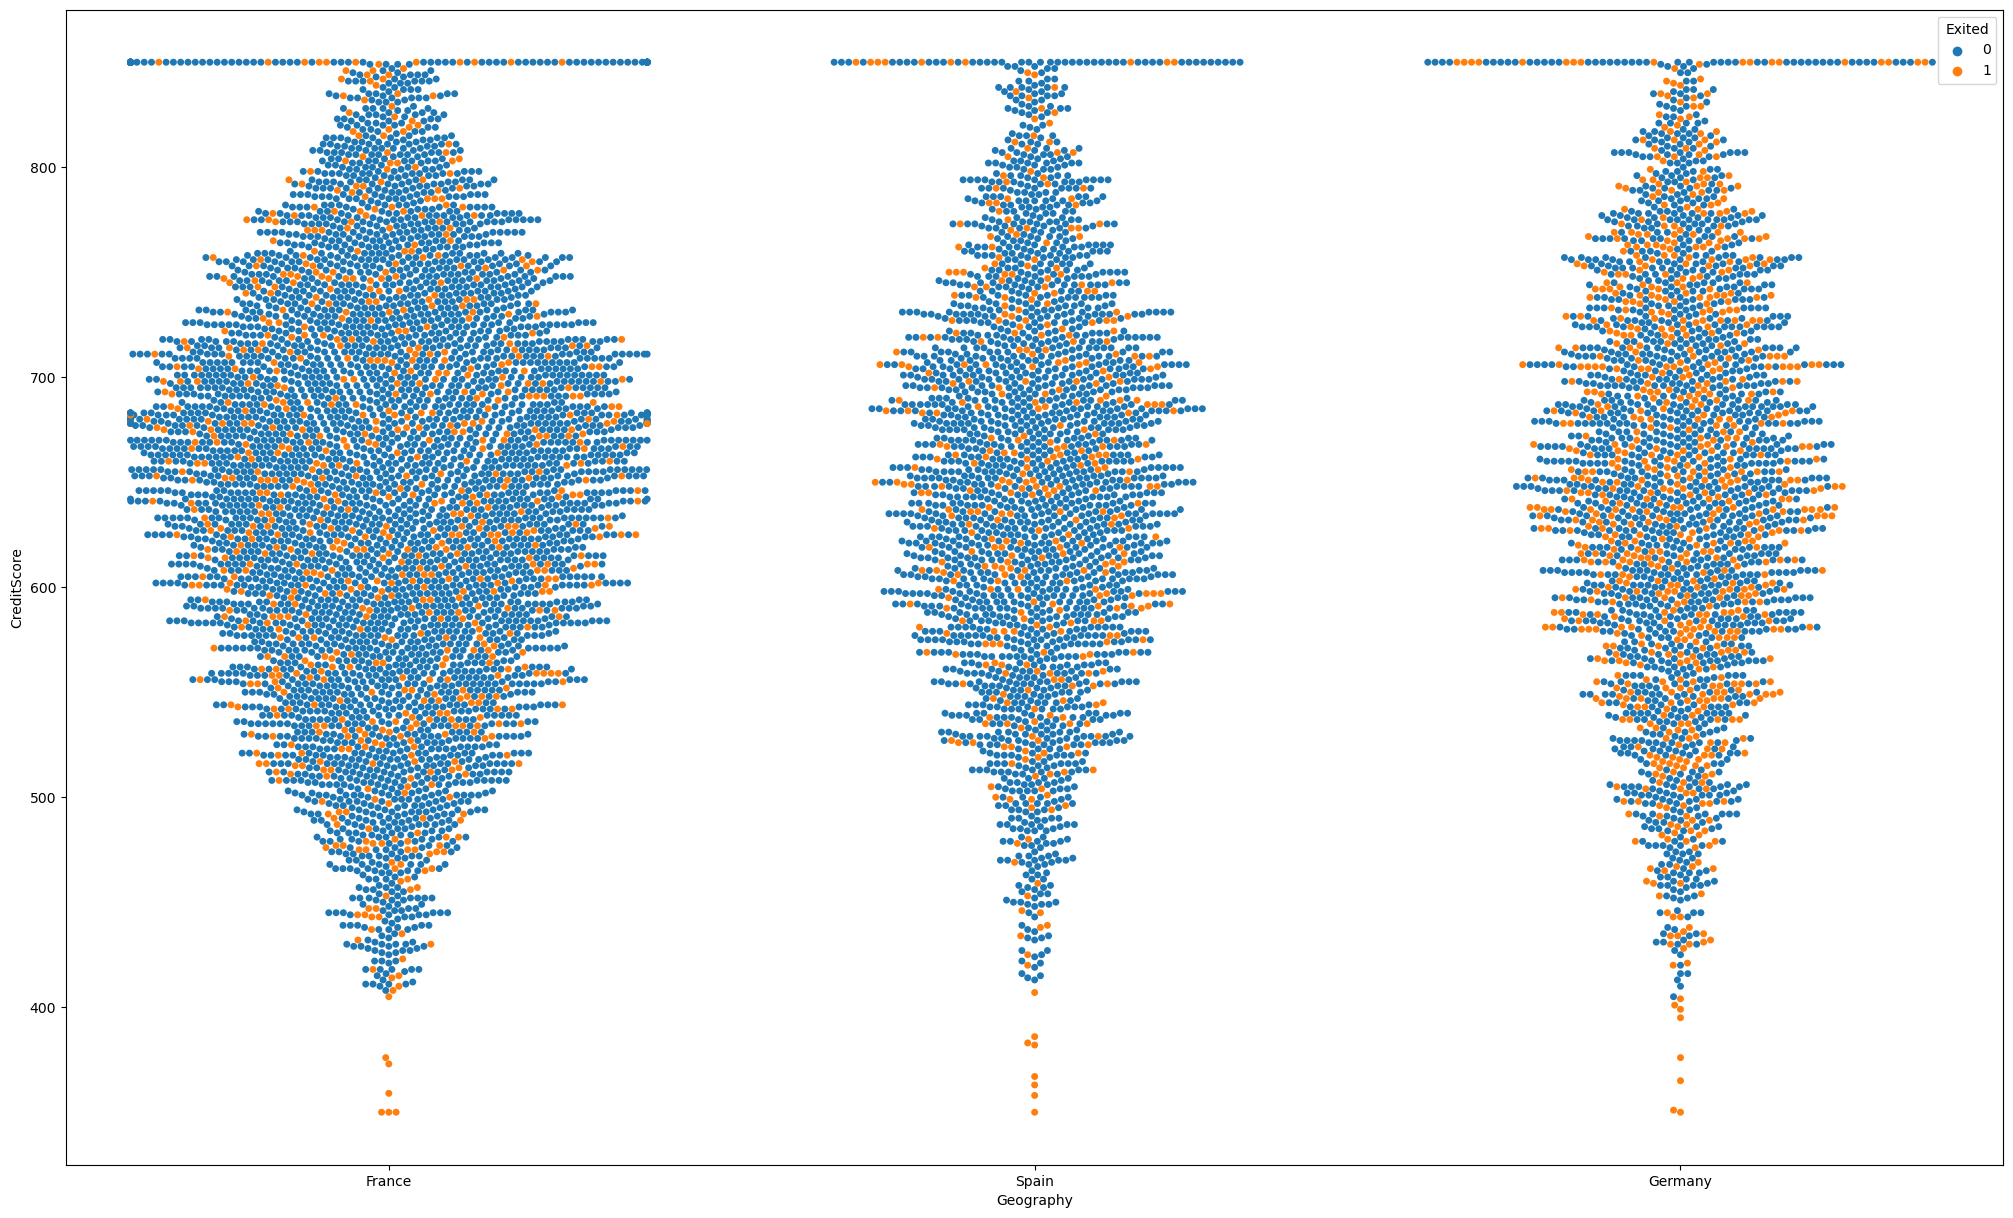

In [12]:
plt.figure(figsize=(25,15))
sns.swarmplot(x=churn.Geography,y=churn.CreditScore,hue=churn.Exited)         #after defining the x- and y- axis, we define that we need the value of 'Exited' relation
plt.show()

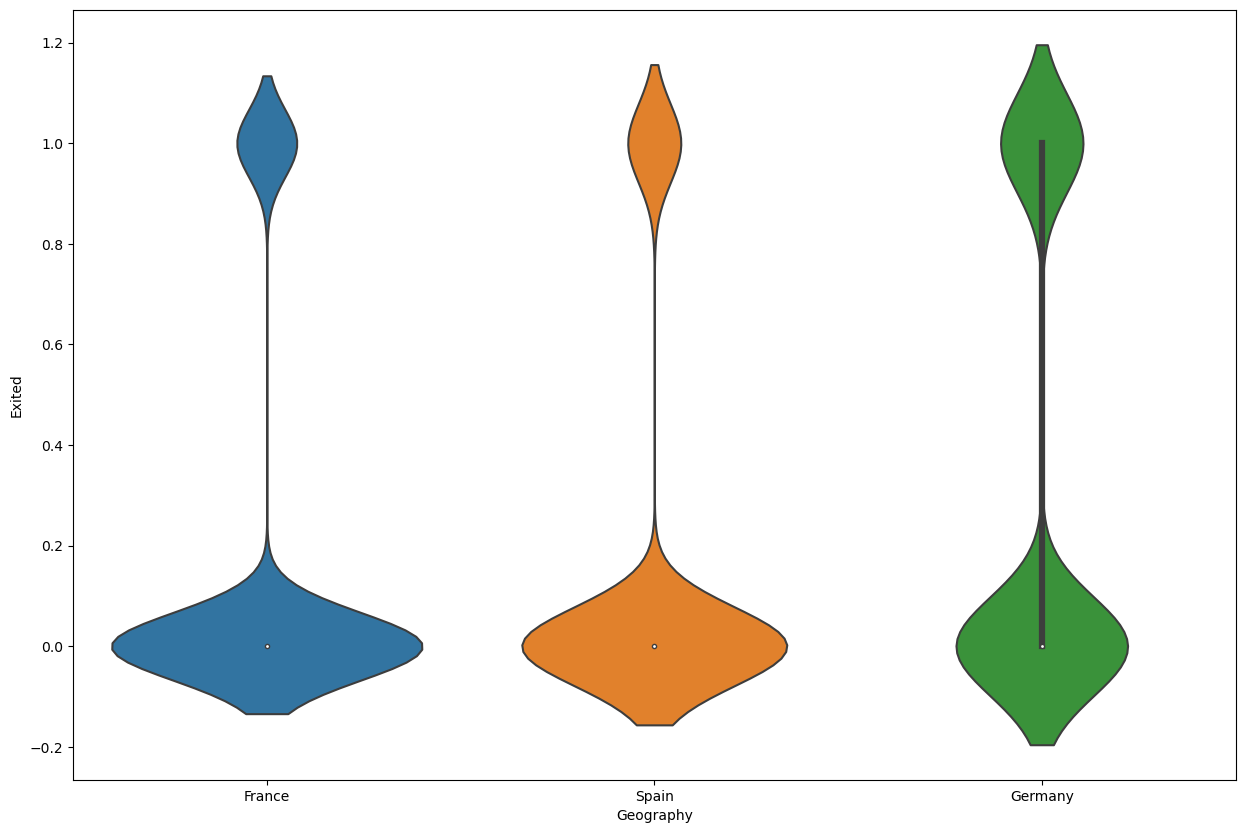

In [13]:
plt.figure(figsize=(15,10))
sns.violinplot(x=churn.Geography,y=churn.Exited)     #not possible for categorcial
plt.show()

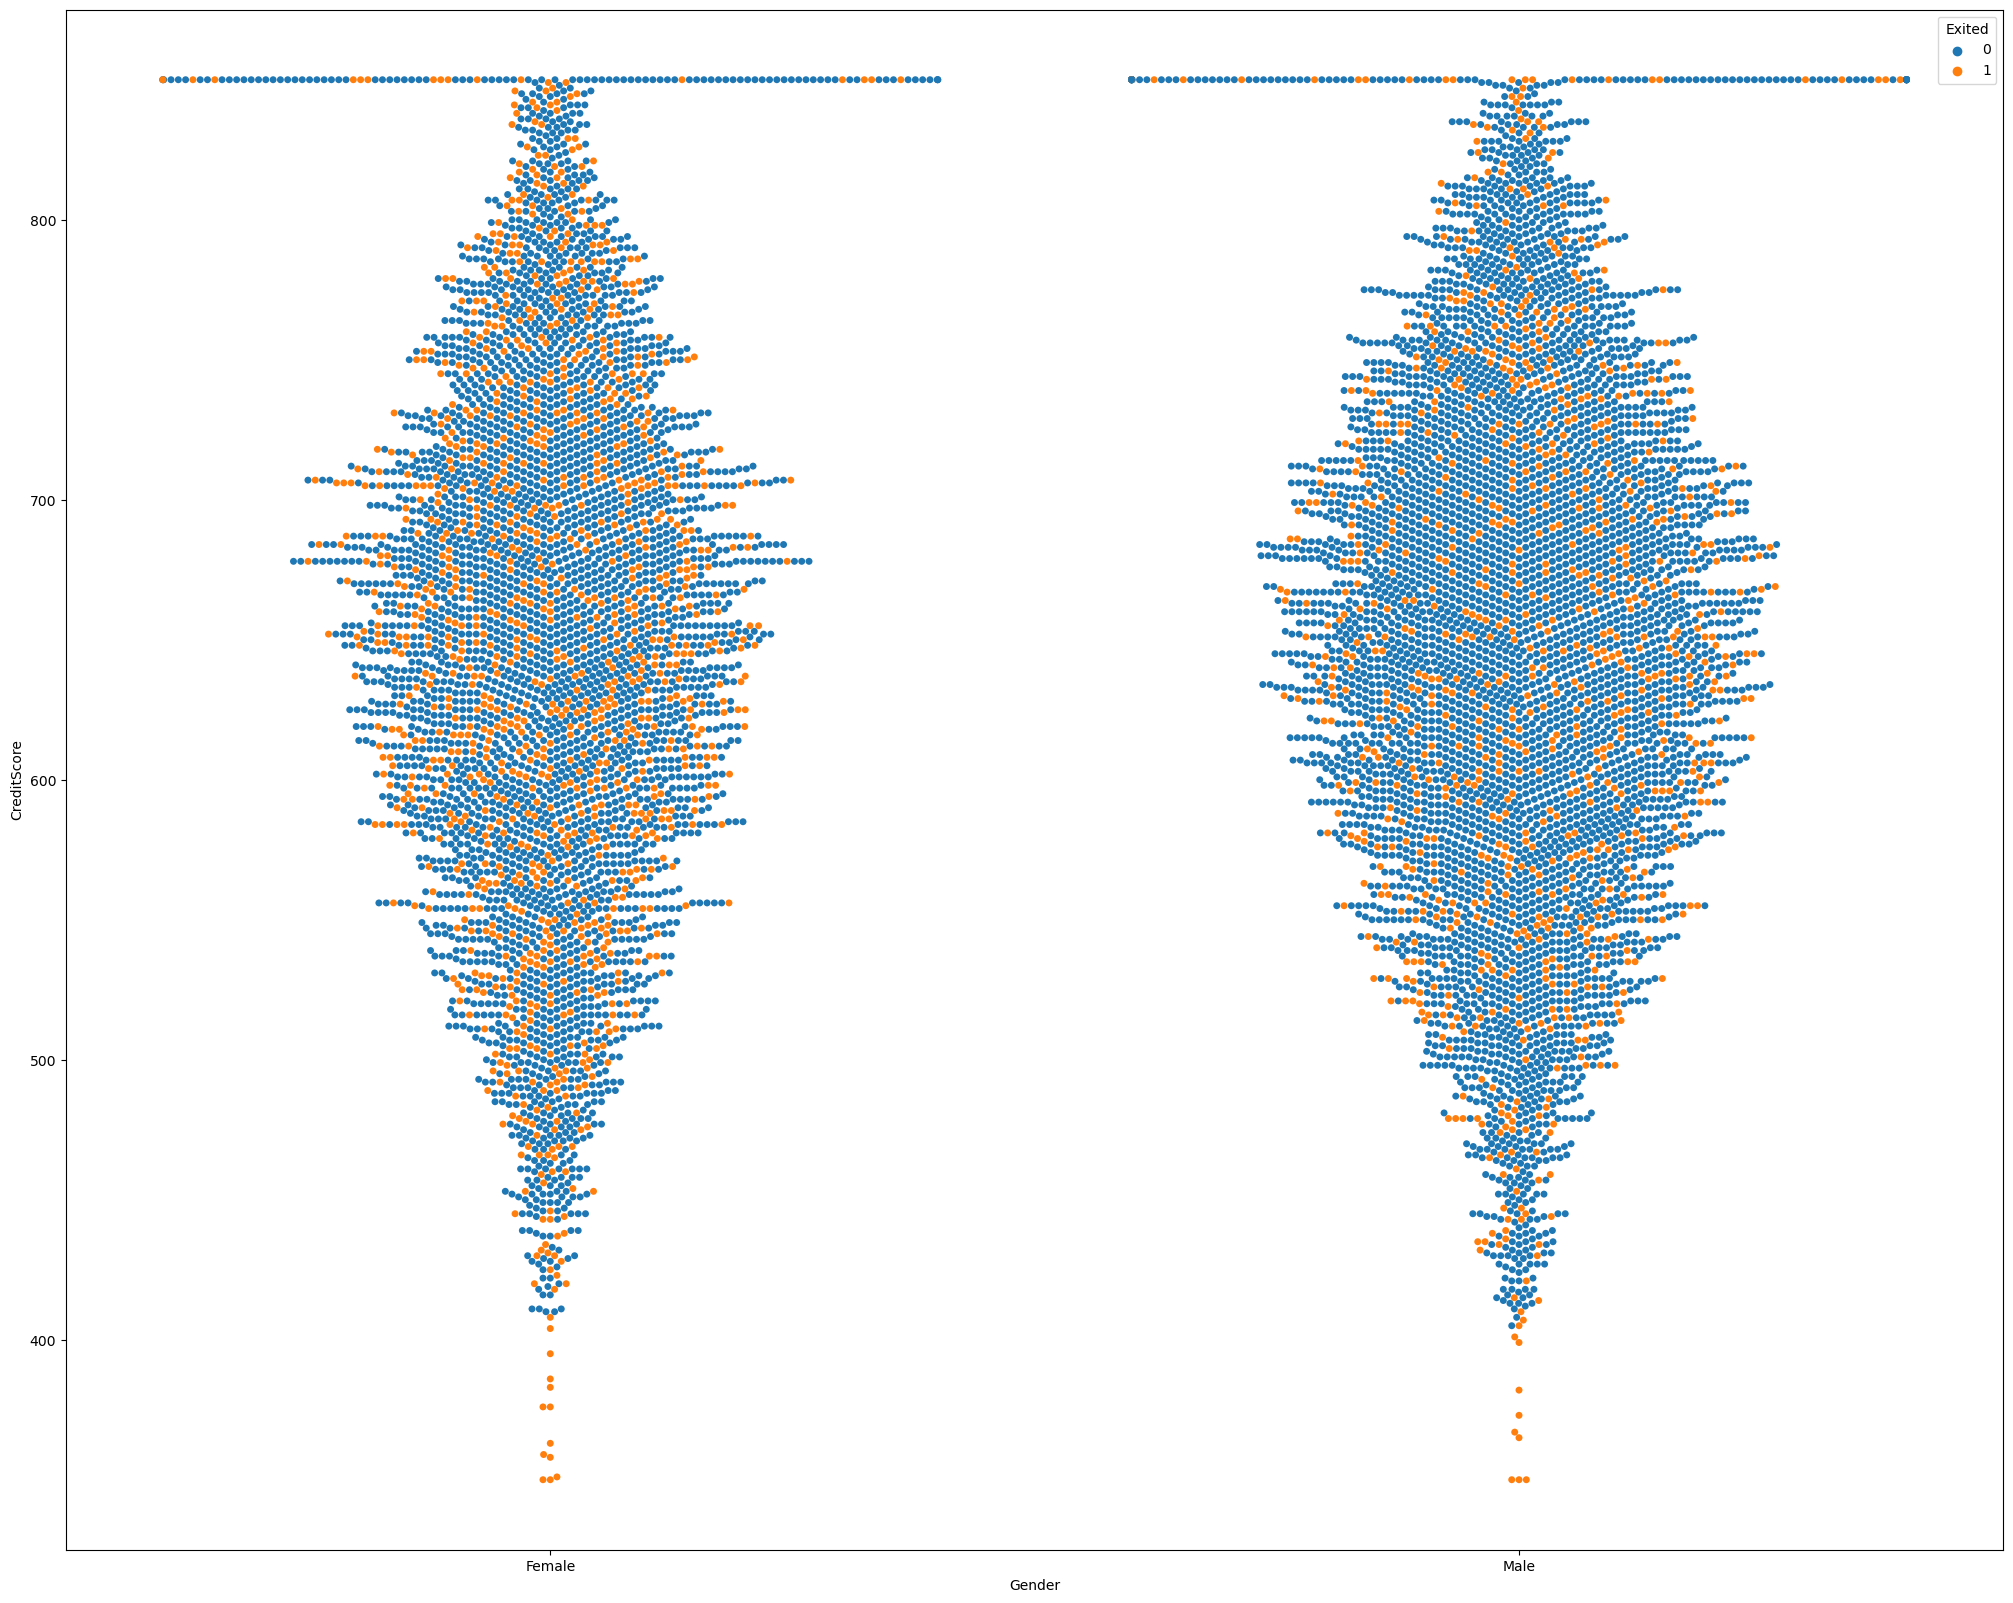

In [14]:
#analysis between gender and exited

plt.figure(figsize=(25,20))
sns.swarmplot(x=churn.Gender,y=churn.CreditScore,hue=churn.Exited)
plt.show()

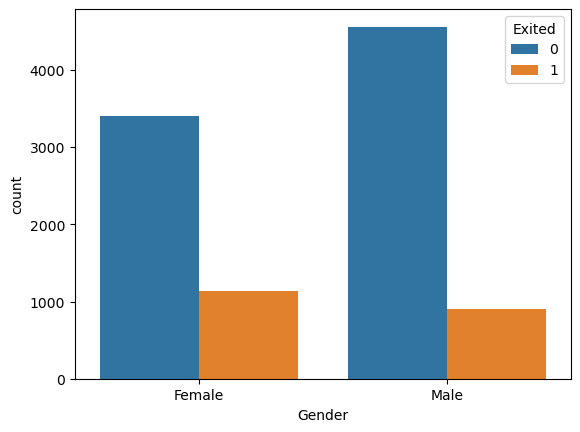

In [15]:
sns.countplot(x=churn.Gender,hue=churn.Exited)
plt.show()

#the data from Gender affects the Exited, as more 'male' people are leaving the bank

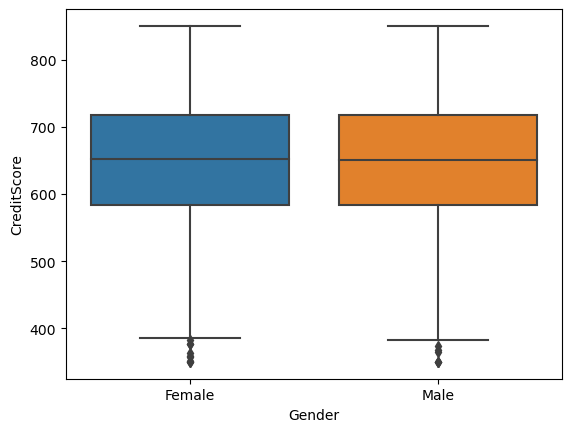

In [16]:
sns.boxplot(x=churn.Gender,y=churn.CreditScore)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


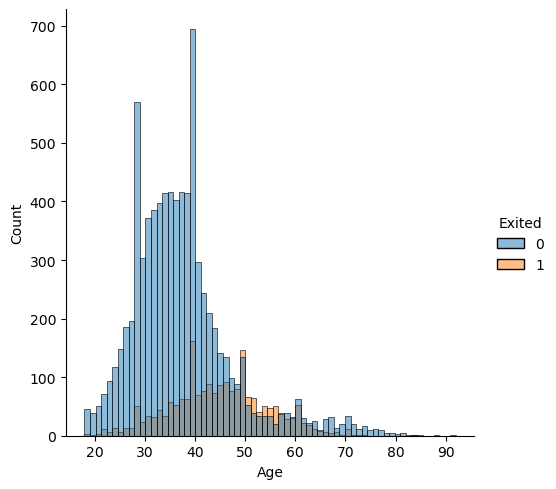

In [17]:
#analysis between age and exited

sns.displot(x=churn.Age,hue=churn.Exited)
plt.show()

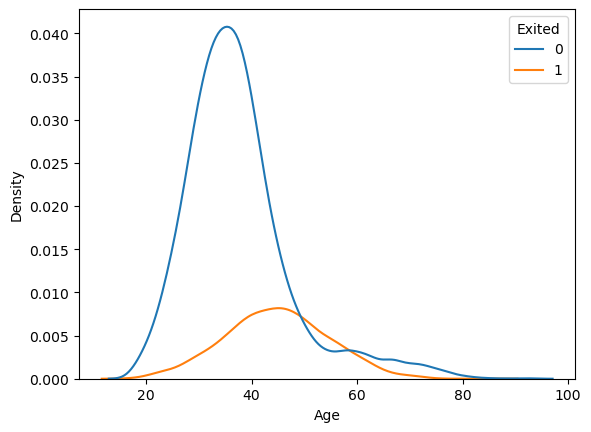

In [18]:
sns.kdeplot(x=churn.Age,hue=churn.Exited)
plt.show()

#less age people are leaving the bank

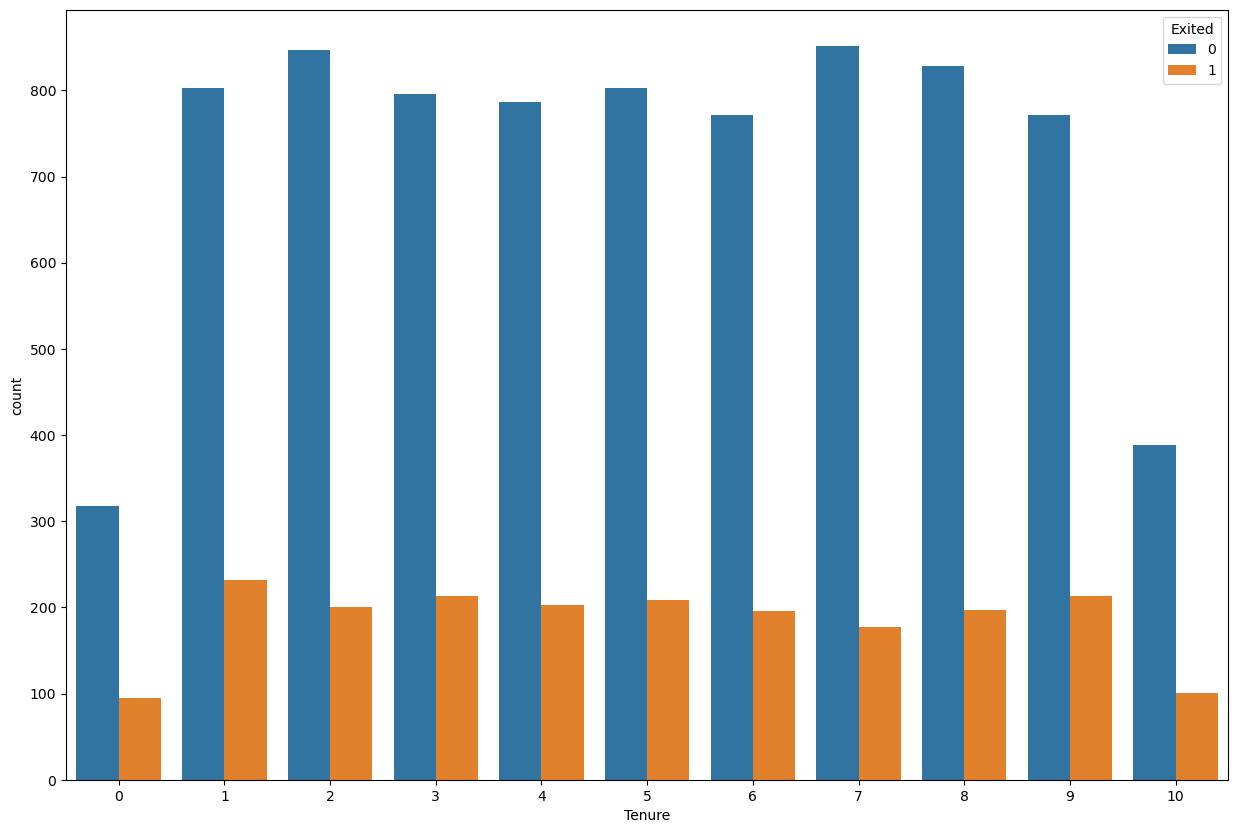

In [19]:
#analysis between tenure and exited

plt.figure(figsize=(15,10))
sns.countplot(x=churn.Tenure,hue=churn.Exited)
plt.show()

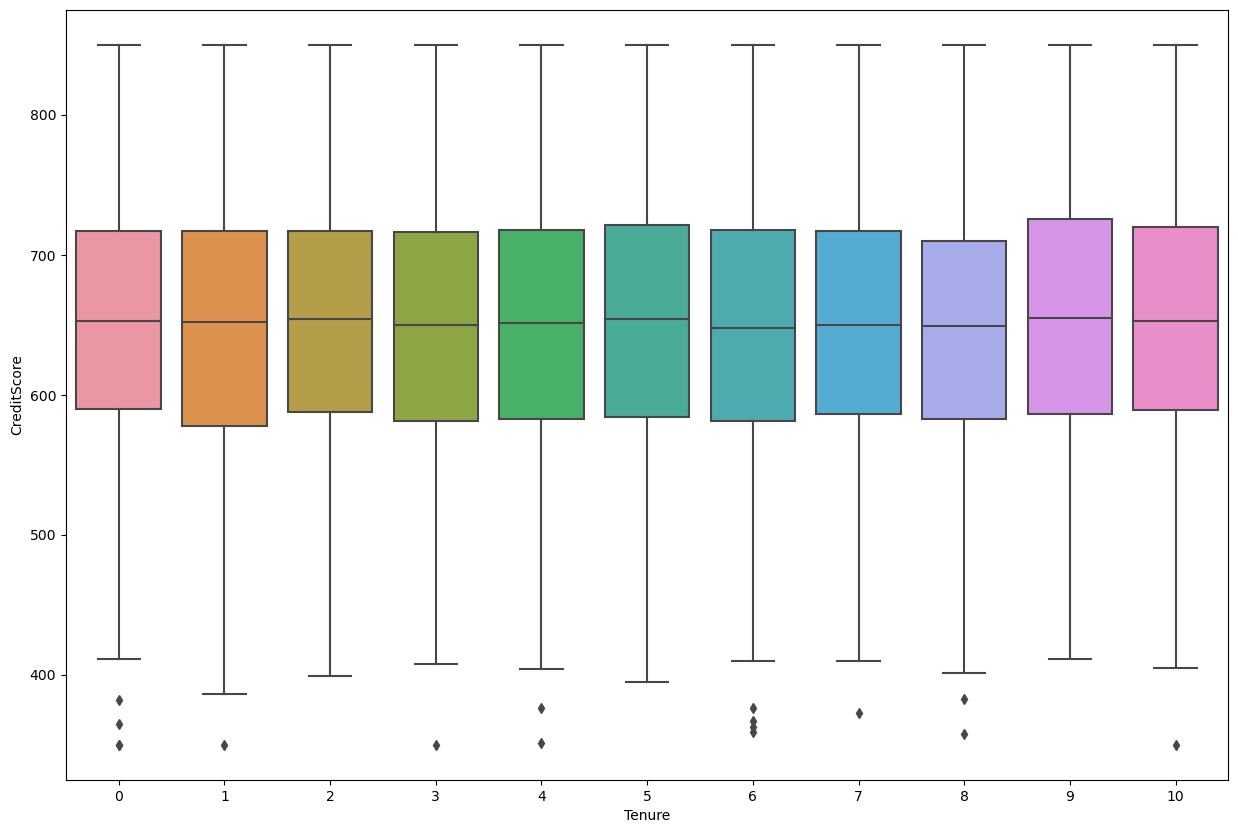

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x=churn.Tenure,y=churn.CreditScore)
plt.show()

/tmp/ipykernel_20/3981106518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Tenure[churn.Exited==1])
/tmp/ipykernel_20/3981106518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Tenure[churn.Exited==0])


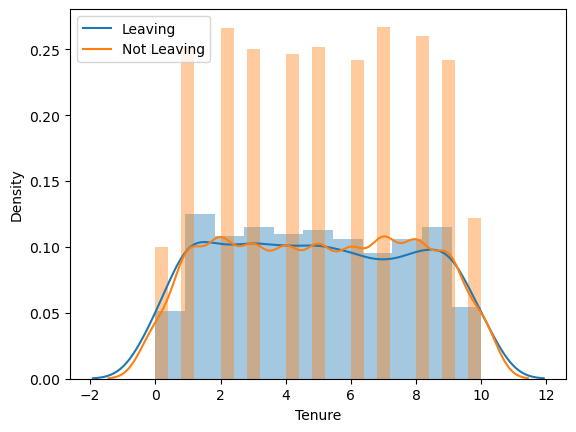

In [21]:
sns.distplot(churn.Tenure[churn.Exited==1])
sns.distplot(churn.Tenure[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#slight overlap can be seen, thus can be dropped in future to improve accuracy

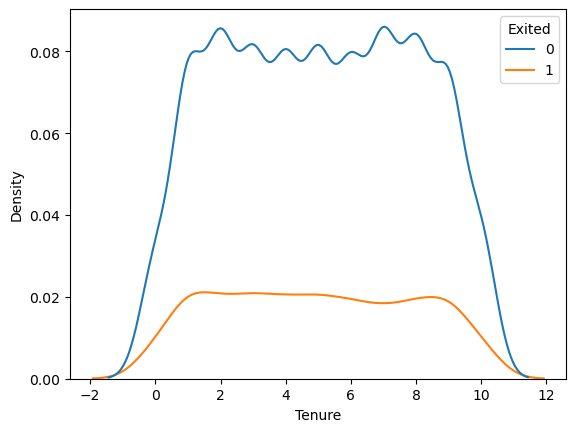

In [22]:
sns.kdeplot(x=churn.Tenure,hue=churn.Exited)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


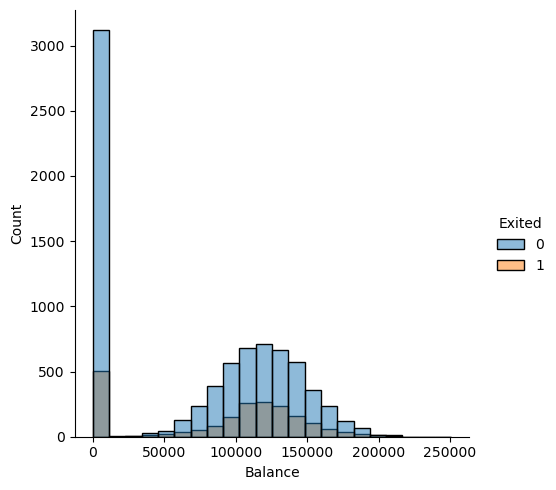

In [23]:
#analysis between balance and exited

sns.displot(x=churn.Balance,hue=churn.Exited)
plt.show()

/tmp/ipykernel_20/3530409707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Balance[churn.Exited==1])
/tmp/ipykernel_20/3530409707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Balance[churn.Exited==0])


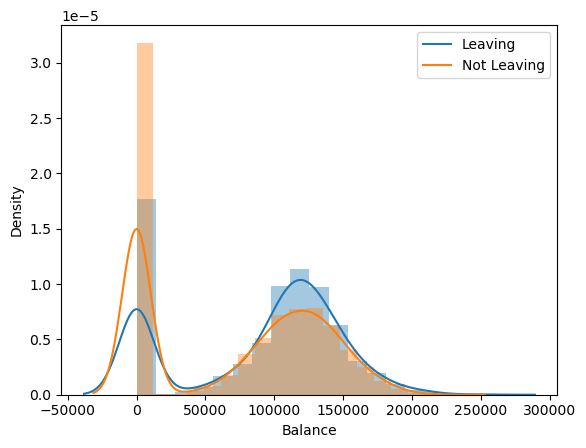

In [24]:
sns.distplot(churn.Balance[churn.Exited==1])
sns.distplot(churn.Balance[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#the data is non-overlapping, thus affecting

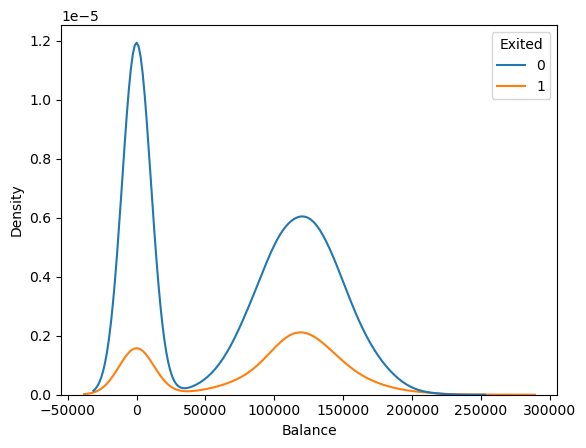

In [25]:
sns.kdeplot(x=churn.Balance,hue=churn.Exited)
plt.show()

/tmp/ipykernel_20/3822692903.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.NumOfProducts[churn.Exited==1])
/tmp/ipykernel_20/3822692903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.NumOfProducts[churn.Exited==0])


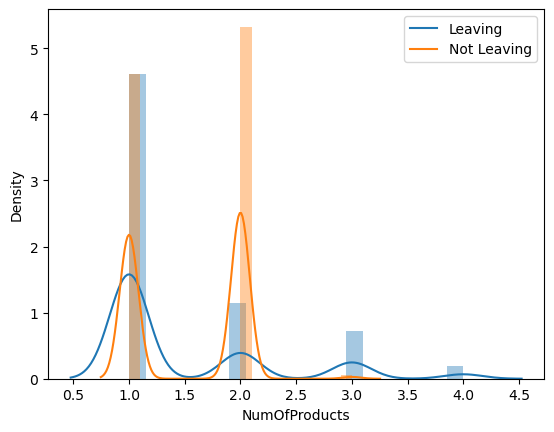

In [26]:
sns.distplot(churn.NumOfProducts[churn.Exited==1])
sns.distplot(churn.NumOfProducts[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#non-overlapping, thus shows that variation 

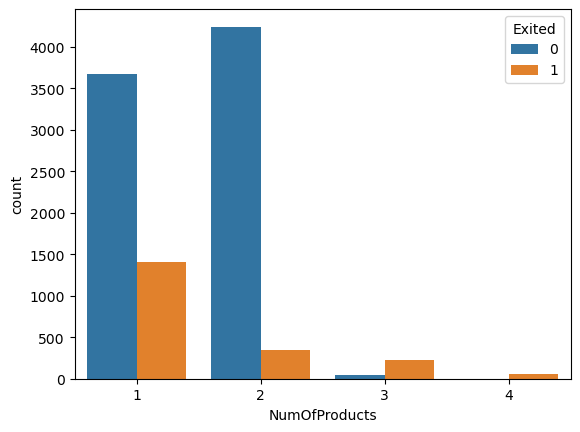

In [27]:
#analysis between NumOfProducts and Exited

sns.countplot(x=churn.NumOfProducts,hue=churn.Exited)
plt.show()

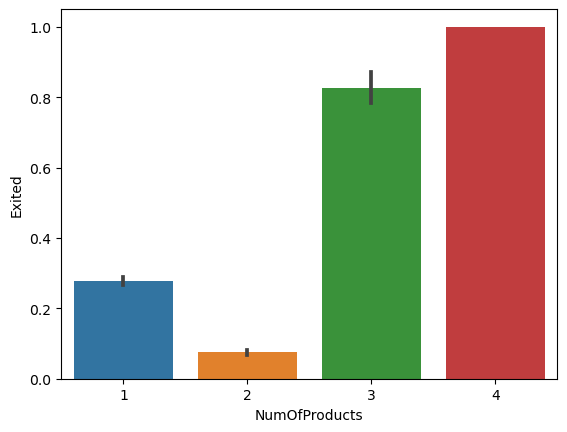

In [28]:
sns.barplot(x=churn.NumOfProducts,y=churn.Exited)
plt.show()


/tmp/ipykernel_20/4015149892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.HasCrCard[churn.Exited==1])
/tmp/ipykernel_20/4015149892.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.HasCrCard[churn.Exited==0])


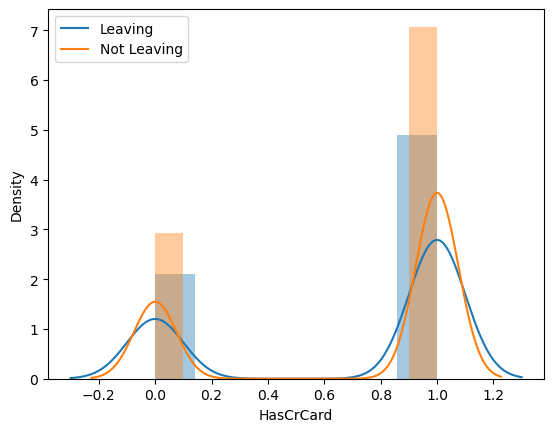

In [29]:
sns.distplot(churn.HasCrCard[churn.Exited==1])
sns.distplot(churn.HasCrCard[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#non-overlapping 

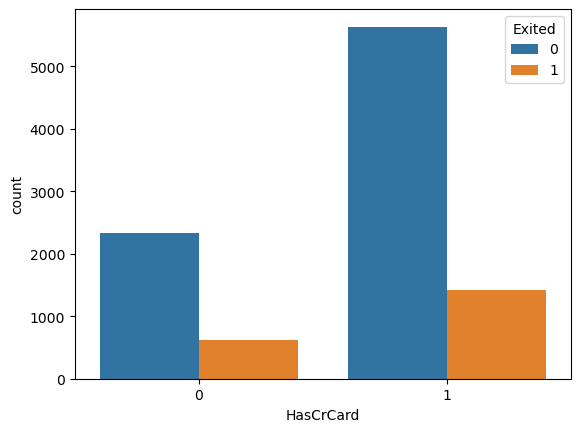

In [30]:
#analysis between hascrcard and exited

sns.countplot(x=churn.HasCrCard,hue=churn.Exited)
plt.show()

#non-overlapping, thus affecting the output

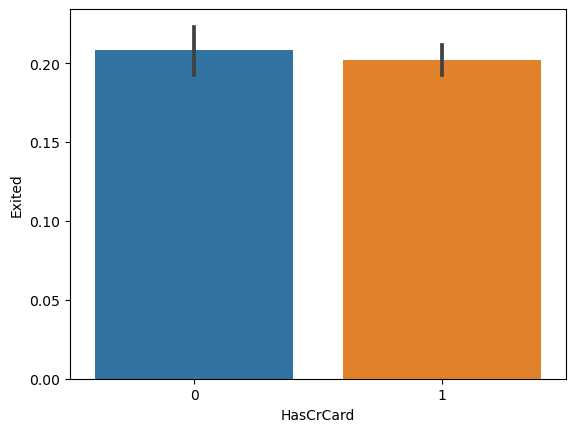

In [31]:
sns.barplot(x=churn.HasCrCard,y=churn.Exited)
plt.show()

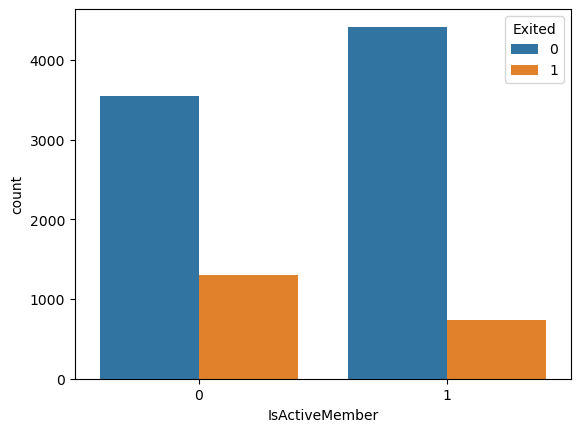

In [32]:
#analysis between isactivemember and exited

sns.countplot(x=churn.IsActiveMember,hue=churn.Exited)
plt.show()

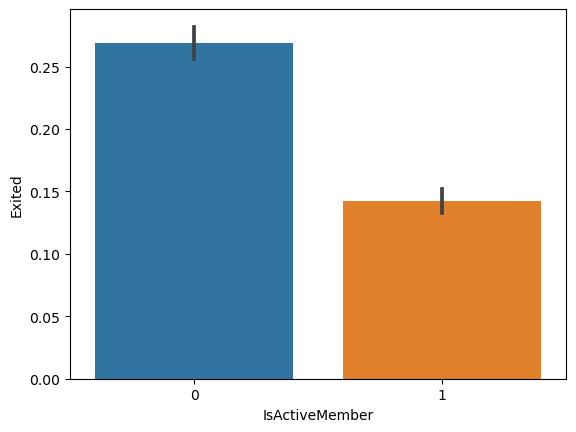

In [33]:
sns.barplot(x=churn.IsActiveMember,y=churn.Exited)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


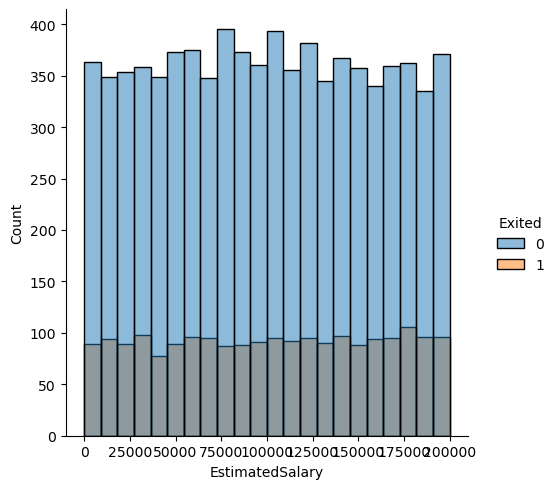

In [34]:
#analysis between estimatedsalary and exited

sns.displot(x=churn.EstimatedSalary,hue=churn.Exited)
plt.show()

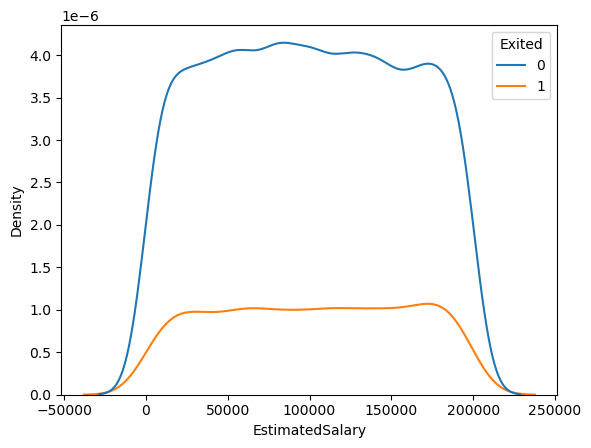

In [35]:
sns.kdeplot(x=churn.EstimatedSalary,hue=churn.Exited)
plt.show()


/tmp/ipykernel_20/1127099885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.EstimatedSalary[churn.Exited==1])
/tmp/ipykernel_20/1127099885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.EstimatedSalary[churn.Exited==0])


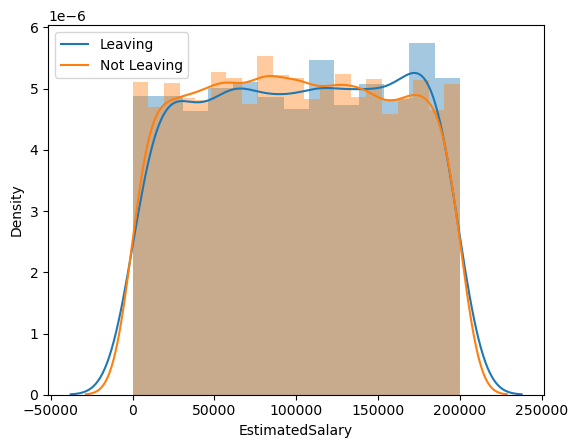

In [36]:
sns.distplot(churn.EstimatedSalary[churn.Exited==1])
sns.distplot(churn.EstimatedSalary[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#sligth overlap, thus can be dropped in future to improve accuracy

# Encoding

## Label Encoding

In [37]:
#from sklearn import preprocessing
#le1 = preprocessing.LabelEncoder()           #label encoder variable for 'Geography'
#churn.Geography = le1.fit_transform(churn.Geography)

#le2 = preprocessing.LabelEncoder()           #label encoder variable for 'Gender'
#churn.Gender = le2.fit_transform(churn.Gender)

#it is always a good practice to use separate encoder variables, as then the data stored can easily be inversed
#churn.Gender.unique()

In [38]:
#churn.Geography.unique()

## Ip/Op creation

In [39]:
ip=churn.drop('Exited',axis=1)
op=churn.Exited

## One-hot encoding

In [40]:
#it is always a good practise to do one-hot encoding after ip/op creation, as for 'Geography' there will be 3 columns
#and for 'Gender' also there will be 2 columns
#one-hot encoding is a common practice in logistic regression with less categories, and when mathematical 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1]),('Gender',OneHotEncoder(),[2])],remainder='passthrough')
#the syntax is ('name of the column',OneHotEncoder(),[index of the column])
#the remainder is declared as 'passthrough', passes other columns and encodes only the mentioned column

ip=np.array(ct.fit_transform(ip),dtype=str)

#proper transformation was not possible, thus 'nparray' was used in 'fit_transform'

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.35,random_state=5)

#split the data into 4 parts, for training and testing

# Standard Scaler

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#make the data to be given training to come in a certain range, it creates consistency

# ML Model

In [43]:
#naive base is based on conditional probability, uses bayes' theorem
#first a event frequency table/matrix is build
#a likelihood table of event dependencies is used
#Good for text data
#Gaussian NB is good when both text data and numeric data are involved
#Multinomial NB is good for only text data, as in NLP spam mail detection
#Bernolli NB is not frequently used

In [44]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

# Prediction

In [45]:
yp=clf.predict(x_test)        #predict the data

# Testing/Accuracy Check

In [46]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,yp)
pre=metrics.precision_score(y_test,yp)
rec=metrics.recall_score(y_test,yp)

#checks the different accuracy checking parameters

print('The accuracy is:',acc)
print('The precisin is:',pre)
print('The recall is:',rec)

The accuracy is: 0.81
The precisin is: 0.5450733752620545
The recall is: 0.3672316384180791
